# Bell State 

To illustrate a multi qubit application of quantum gates, we will create a Bell state. A Bell state is a two qubit state that is maximally entangled.

In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import plotly.express as px

from skq.gates import *
from skq.utils import to_bitstring
from skq.circuits import BellStates
from skq.quantum_info import PhiPlusState

In [3]:
pipe = BellStates().circuit(configuration=1)
pipe

 CX([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
     [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
     [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
     [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])]

In [4]:
# |00> qubits
two_qubit_zero_state = np.array([1, 0, 0, 0], dtype=complex)

$$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

This will result in $|00\rangle$ or $|11\rangle$ measured with equal probability.

In [5]:
hadamard = pipe[0](two_qubit_zero_state)
hadamard

H([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j])

In [6]:
bell_state = pipe[-1](two_qubit_zero_state)
bell_state

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [7]:
measurements = [np.random.choice(["00", "01", "10", "11"], p=np.abs(pipe(two_qubit_zero_state)) ** 2) for _ in range(1000)]
measurements[:5]

['11', '11', '00', '00', '11']

In [8]:
# Convert measurements to a string representation for plotting
measurement_strings = to_bitstring(measurements)
measurement_strings[:5]

['11', '11', '00', '00', '11']

In [9]:
# Plot the results using Plotly
fig = px.histogram(measurement_strings, x=measurement_strings, title="Measurement Results of Bell State", labels={"x": "Measurement Outcome", "y": "Count"}, text_auto=True)
fig.show()

For convenience we can also directly get the Bell State as a StateVector.

In [10]:
phi_plus = PhiPlusState()
phi_plus

PhiPlusState([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
              0.70710678+0.j])

In [11]:
measurements = [phi_plus.measure_bitstring() for _ in range(1000)]
px.histogram(measurements)

# Interoperability with other frameworks

Lots of `skq` objects can be converted to Qiskit or OpenQASM. This includes state vectors, density matrices, gates and circuits.

In [12]:
phi_plus.to_qiskit()

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


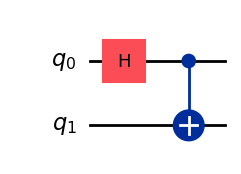

In [13]:
qc = pipe.convert(framework="qiskit")
qc.draw(output="mpl")

In [14]:
qc

In [15]:
print(pipe.convert(framework="qasm"))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
cx q[0], q[1];
